# Proyecto final de Data Science
### Comisión: 19950
### Profesor: Omar Muñoz
###  Alumno: Federico Asensio
### Tutor: Jose Nardulli

**Consigna:**
Entender el problema de negocio e identificar los elementos a ser considerados para el planteamiento de un Modelo de Data Science. Describir los datos de negocio y las relaciones entre datos mediante el Análisis Exploratorio de Datos. Elegir el algoritmo de entrenamiento y preparar los datos para el proceso de entrenamiento del modelo. Evaluar los indicadores de desempeño predictivo del modelo y realizar optimizaciones. Construir una presentación ejecutiva para la alta gerencia mostrando los resultados del modelo.

Lograr una articulación en equipo y una división de tareas adecuadas a los objetivos. Comparar entre los modelos realizados, presentando las distintas medidas y determinar cuál es el mejor

Se debe entregar: Presentación de la empresa, organización o problema específico. Preguntas y objetivos de la investigación. Conformación del equipo de trabajo.

## Idea del negocio


La idea principal del negocio es realizar un modelo que pueda categorizar a los jugadores de fútbol en 3 grandes grupos según su valor de mercado. Para ello, utilicé un dataset de Fifa 22 el cual cuenta con los registros de los jugadores, edad, potencial, calidad, valor, club, liga, habilidades, posición entre muchas variables que posee.

Una vez que se desarrolle el modelo, se lo presentaré a los potenciales clientes que pueden ser clubes, jugadores de futbol, scoutings y representantes para que puedan entender en que posición se encuentra el jugador ante el mercado

In [1]:
# Importo las librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling


## 1. Data acquistion

El dataset se basa en un archivo CSV que tiene datos acerca de los jugadores del FIFA 22

### 1.1 Dataset

In [2]:
# Cargo los datos del csv en un DataFrame
df = pd.read_csv("C:/Users/federico.asensio/Desktop/Fede/coder/players_22.csv", low_memory = False)
pd.set_option('display.max_columns', None)


df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


#### Columnas del dataset

Name: nombre

Position: posiciones en las que pueden jugar

Club

Division: división

Based: País de la liga en la que juegan

Nacionalidad

Altura

Peso

Edad

Pierna preferida

Posición preferida

Mejor posición

Valor de mercado

Liga

Cláusula de rescición

Salario

Overall: Cada jugador tiene un valor de calidad actual que puede oscilar entre 1 y 99. Ese valor está oculto y determina, en gran medida, cuán bueno es ese jugador.

Potential: La calidad potencial es un valor oculto al igual que la Overall va de 1 a 99, y es el límite que los jugadores pueden llegar a alcanzar. 

Demás habilidades de los jugadores como velocidad, aceleración, definición, entre otros.


## 2. Data Wrangling

### 2.1 Preprocesamiento de los datos


In [3]:
df.shape

(19239, 110)

In [4]:
#Totalidad de registros válidos por columnas antes de la limpieza para conocer nulos
df.count()/df.shape[0]*100


sofifa_id           100.000000
player_url          100.000000
short_name          100.000000
long_name           100.000000
player_positions    100.000000
                       ...    
player_face_url     100.000000
club_logo_url        99.682936
club_flag_url        99.682936
nation_logo_url       3.945111
nation_flag_url     100.000000
Length: 110, dtype: float64

Insight: el dataset tiene 7 columnas con más del 90% de valores nulos. Las cuales no son importantes como para tratar los datos y ponerles un valor

### 2.2 Identificación del tipo de datos

In [5]:
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [7]:
df = df.drop(columns = ['sofifa_id', 'player_url','short_name','long_name','dob','club_loaned_from','club_joined','player_tags','player_traits','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk'])
#elimino las columnas que ya se que no me van a servir y muestro el dataset

### 2.3 Manipulación de los datos

In [8]:
df.isnull().sum()

player_positions               0
overall                        0
potential                      0
value_eur                     74
wage_eur                      61
                           ...  
goalkeeping_handling           0
goalkeeping_kicking            0
goalkeeping_positioning        0
goalkeeping_reflexes           0
goalkeeping_speed          17107
Length: 69, dtype: int64

In [9]:
#con esto ya se borra los value nulos y también los wage nulos ya que considero que son dos campos determinantes para mi modelo
df = df[df['value_eur'].notna()]
nulldeclausulas = df['release_clause_eur'].isnull().sum()/df['release_clause_eur'].value_counts().sum()
print('El porcentaje de nulos en las clausulas de rescisión es de: ', nulldeclausulas * 100,'% entonces también lo borro')
df = df[df['release_clause_eur'].notna()]


El porcentaje de nulos en las clausulas de rescisión es de:  6.100869180091901 % entonces también lo borro


In [10]:
df['atack'] = df[['attacking_crossing', 'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys']].mean(axis=1)
df['skills'] = df[['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control']].mean(axis=1)    
df['movement'] = df[['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance']].mean(axis=1)    
df['power'] = df[['power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots']].mean(axis=1)    
df['mentality'] = df[['mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure']].mean(axis=1)    
df['defending'] = df[['defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle']].mean(axis=1)    
df['goalkeeping'] = df[['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']].mean(axis=1)    


df.head()

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,atack,skills,movement,power,mentality,goalkeeping
0,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,26.333333,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,85.8,94.0,90.2,77.8,73.833333,10.8
1,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,32.000000,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,86.0,81.4,81.6,84.8,80.666667,10.2
2,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,26.666667,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,87.6,83.6,85.4,87.2,74.333333,11.6
3,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,32.000000,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,80.6,89.2,90.2,71.8,77.000000,11.8
4,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,62.000000,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,81.4,88.0,80.0,81.6,82.666667,11.2


Cree 4 columnas con el promedio de las habilidades para agrupar en ataque, skills, movimiento, poder/potencia, mentalidad, defensa y habilidades de arquero

In [11]:
df['club_position'] = np.where(df['club_position'] =='RES', 0, np.where(df['club_position'] =='SUB',1,2 ))


Creo una variable para identificar si el jugador es titular, suplente o está en reserva

**0:** jugadores de reserva

**1:** jugadores suplentes

**2:** jugadores titulares

In [12]:
df['nivel_jugador'] = np.where(df['overall'] > 80, 3, np.where(df['overall'] <70 ,1,2 ))
df.head()

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,atack,skills,movement,power,mentality,goalkeeping,nivel_jugador
0,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,2,30.0,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,26.333333,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,85.8,94.0,90.2,77.8,73.833333,10.8,3
1,ST,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,2,9.0,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,32.000000,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,86.0,81.4,81.6,84.8,80.666667,10.2,3
2,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,2,7.0,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,26.666667,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,87.6,83.6,85.4,87.2,74.333333,11.6,3
3,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,2,10.0,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,32.000000,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,80.6,89.2,90.2,71.8,77.000000,11.8,3
4,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,2,17.0,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,62.000000,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,81.4,88.0,80.0,81.6,82.666667,11.2,3


**1:** jugadores con nivel de menos de 70 de overall

**2:** jugadores entre 70 y 80

**3:** jugadores con más de 80 de overall

In [13]:
df['market'] = np.where(df['value_eur'] > 25000000, 3, np.where(df['value_eur'] < 1000000 ,1,2 ))


Los dividos segun rangos de precios

**3:** jugadores de más de 25 millones

**2:** jugadores de entre 1 millon y 25 millones

**1:** jugadores de menos de un millón

Lo realizo de esta forma debido a la cantidad de jugadores que hay de cada valor, así queda un poco más balanceado para el modelo

## 2.4 Análisis exploratorio

<Figure size 720x480 with 0 Axes>

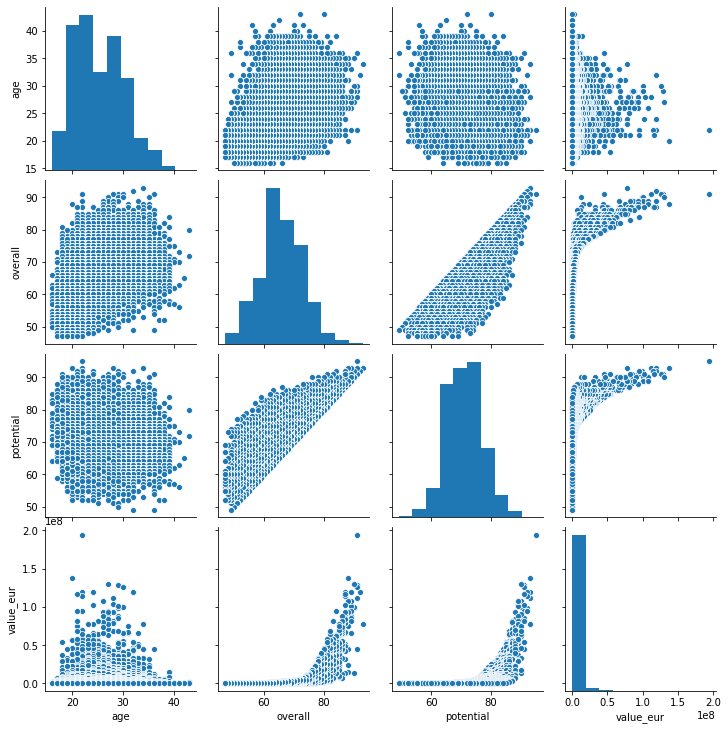

In [14]:
plt.figure(dpi=120)
sns.pairplot(df, x_vars=['age','overall','potential','value_eur'],y_vars=['age','overall','potential','value_eur'])
plt.show()

Acá puedo ver como la edad no se encuentra estrictamente relacionada con el valor del mercado, si el potencial y la calidad actual. Por otra parte el potencial está relacionado con la calidad, pero no con la edad. En cuanto a la calidad actual se encuentra relacionado con el potencial y el valor del mercado, y en menor medida, con la edad del jugador

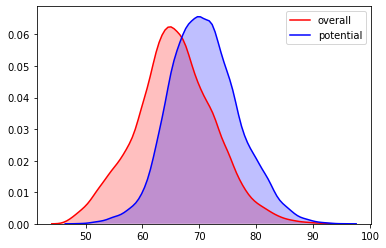

In [15]:
fig = sns.kdeplot(df['overall'], shade=True, color="r")
fig = sns.kdeplot(df['potential'], shade=True, color="b")
plt.show()

Se puede observar como los jugadores tienden a mejorar en el juego. Las dos distribuciones son normales, la de potencial es mayor, por eso llego a la conclusión anterior.

Text(0, 0.5, 'Cantidad de jugadores')

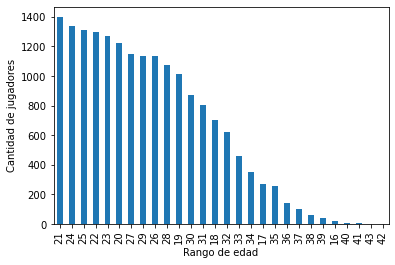

In [16]:
ax = df['age'].value_counts().plot(kind = 'bar')
ax.set_xlabel("Rango de edad")
ax.set_ylabel("Cantidad de jugadores")

La mayor cantidad de jugadores se encuentran entre los 20 y 30 años

<AxesSubplot:xlabel='overall', ylabel='value_eur'>

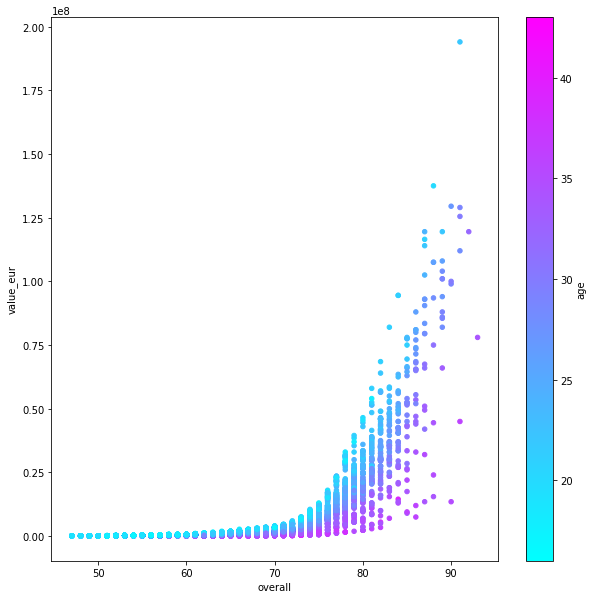

In [17]:
scatter = df.plot( kind = 'scatter',x = 'overall', y= 'value_eur', c='age',colormap='cool', figsize = (10,10), sharex=False  )
scatter

Se puede ver como a mayor overall se tiene mayor valor de mercado. También se destaca que los jóvenes con igual overall que sus mayores, valen más

{'whiskers': [<matplotlib.lines.Line2D at 0x1bba7ff1c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1bba7d81220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bba7ff1970>],
 'medians': [<matplotlib.lines.Line2D at 0x1bba7d817c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bba7d81a90>],
 'means': []}

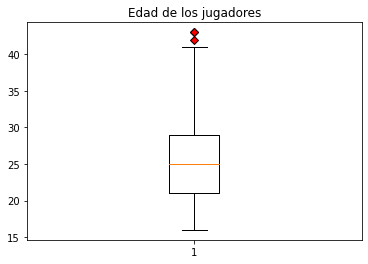

In [18]:
#Identifiquemos si existen outliers en las edades

red = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.set_title('Edad de los jugadores')
ax.boxplot(df['age'], flierprops=red)

Se puede ver como la mayoría de los jugadores se encuentra entre los 20 y 30 años. A pesar de esto, hay algunos jugadores que extrañamente siguen compitiendo luego de los 40

{'whiskers': [<matplotlib.lines.Line2D at 0x1bba80be0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bba80be670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bba80b4d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1bba80bec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bba80beee0>],
 'means': []}

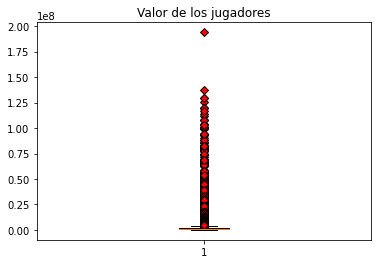

In [19]:
#Identifiquemos si existen outliers en las edades

red = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots()
ax.set_title('Valor de los jugadores')
ax.boxplot(df['value_eur'], flierprops=red)

Hay muchos outliers en los valores de los jugadores, posteriormente en mi modelo, tendré que fijarme que no tenga muchos errores en los jugadores con mayor nivel

In [20]:
#vemos la moda de todos los jugadores
df.mode().head(1)

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,atack,skills,movement,power,mentality,goalkeeping,nivel_jugador,market
0,CB,65.0,70.0,1200000.0,2000.0,21.0,180.0,70.0,1.0,Arsenal,USA Major League Soccer,1.0,1.0,10.0,2022.0,14.0,England,1318.0,SUB,5.0,Right,3.0,2.0,1.0,Medium/Medium,Normal (170-185),No,1100000.0,66.0,60.0,60.0,64.0,62.333333,67.0,58.0,58.0,58.0,65.0,55.0,65.0,45.0,35.0,60.0,65.0,68.0,68.0,70.0,60.0,70.0,65.0,70.0,70.0,70.0,59.0,65.0,65.0,58.0,58.0,45.0,55.0,60.0,65.0,62.0,8.0,10.0,9.0,10.0,9.0,44.0,54.8,56.0,64.8,62.4,61.5,10.2,1.0,1.0


In [21]:
overall_mean = df['overall'].mean()
potential_mean  = df['potential'].mean()
value_mean = df['value_eur'].mean()
wage_mean  = df['wage_eur'].mean()
print('Promedios')
print('overall: ', overall_mean)
print('potential: ', potential_mean)
print('value: ', value_mean)
print('wage: ', wage_mean)

Promedios
overall:  65.70004982561036
potential:  70.88296517743453
value:  2840796.323977191
wage:  8797.636051597188


<AxesSubplot:>

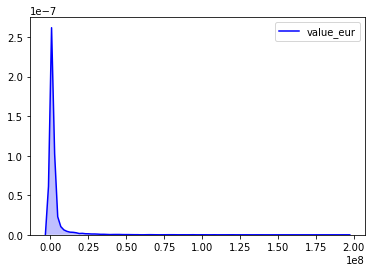

In [22]:
#distribución de los datos
fig = sns.kdeplot(df['value_eur'], shade=True, color="b")
fig


Las valoraciones promedios de los jugadoers son bajas, pero el valor es alto. Esto se debe a lo que aportan los jugadores con mucho valor, lo confirmamos con el gráfico de arriba

In [23]:
df.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_position,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,atack,skills,movement,power,mentality,goalkeeping,nivel_jugador,market
count,18063.000000,18063.000000,1.806300e+04,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,667.000000,667.000000,18063.000000,18063.000000,18063.000000,1.806300e+04,16020.000000,16020.000000,16020.000000,16020.000000,18063.000000,16020.00000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,2043.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000,18063.000000
mean,65.700050,70.882965,2.840796e+06,8797.636052,25.317611,181.263135,74.943199,50885.169573,1.341914,1.236672,20.863367,2022.818524,59.016996,13663.050975,12.484258,2.942479,2.341305,1.095776,5.374044e+06,68.080087,52.182272,57.287640,62.441074,46.947277,64.86161,49.498920,45.639484,51.621436,58.741128,42.242485,55.413386,47.115595,42.155401,53.034933,58.269390,64.468914,64.523667,63.362011,61.370370,64.024082,57.612910,64.848198,63.066988,65.004816,46.433760,55.516304,46.750817,50.115319,53.867962,47.688258,57.798871,46.663622,48.155788,46.022422,16.530366,16.318718,16.176272,16.345347,16.626529,36.474792,49.548691,51.197741,63.549809,59.393334,51.956255,15.887457,1.301500,1.502685
std,6.935674,6.081773,7.733646e+06,19570.263045,4.770499,6.865622,7.069657,54448.775349,0.735256,0.718533,17.766168,1.225968,50.541144,34325.145647,6.975352,0.673100,0.767764,0.375025,1.494837e+07,10.949442,14.060609,10.107236,9.678486,20.380544,9.80615,18.118255,19.726912,17.368363,14.592720,17.679068,18.858773,18.253591,17.243360,15.091132,16.757233,15.198823,15.009047,14.899423,9.102969,14.357858,13.212519,12.130514,16.274778,12.665589,19.454387,17.021317,20.652220,19.666544,13.702411,15.826521,12.239663,20.239960,21.208270,20.722585,17.694036,16.958455,16.680580,17.185557,18.005773,10.759809,15.015615,15.821916,11.408198,10.349371,12.605756,15.680636,0.502239,0.537469
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,0.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,7.000000,29.00000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,4.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,7.800000,8.600000,23.000000,26.400000,10.500000,2.000000,1.000000,1.000000
25%,61.

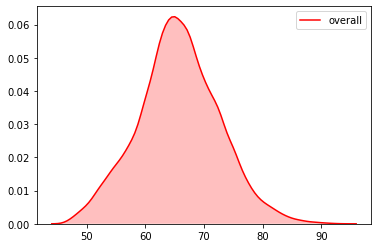

In [24]:
fig = sns.kdeplot(df['overall'], shade=True, color="r")


## 2.6 Análisis bivariado

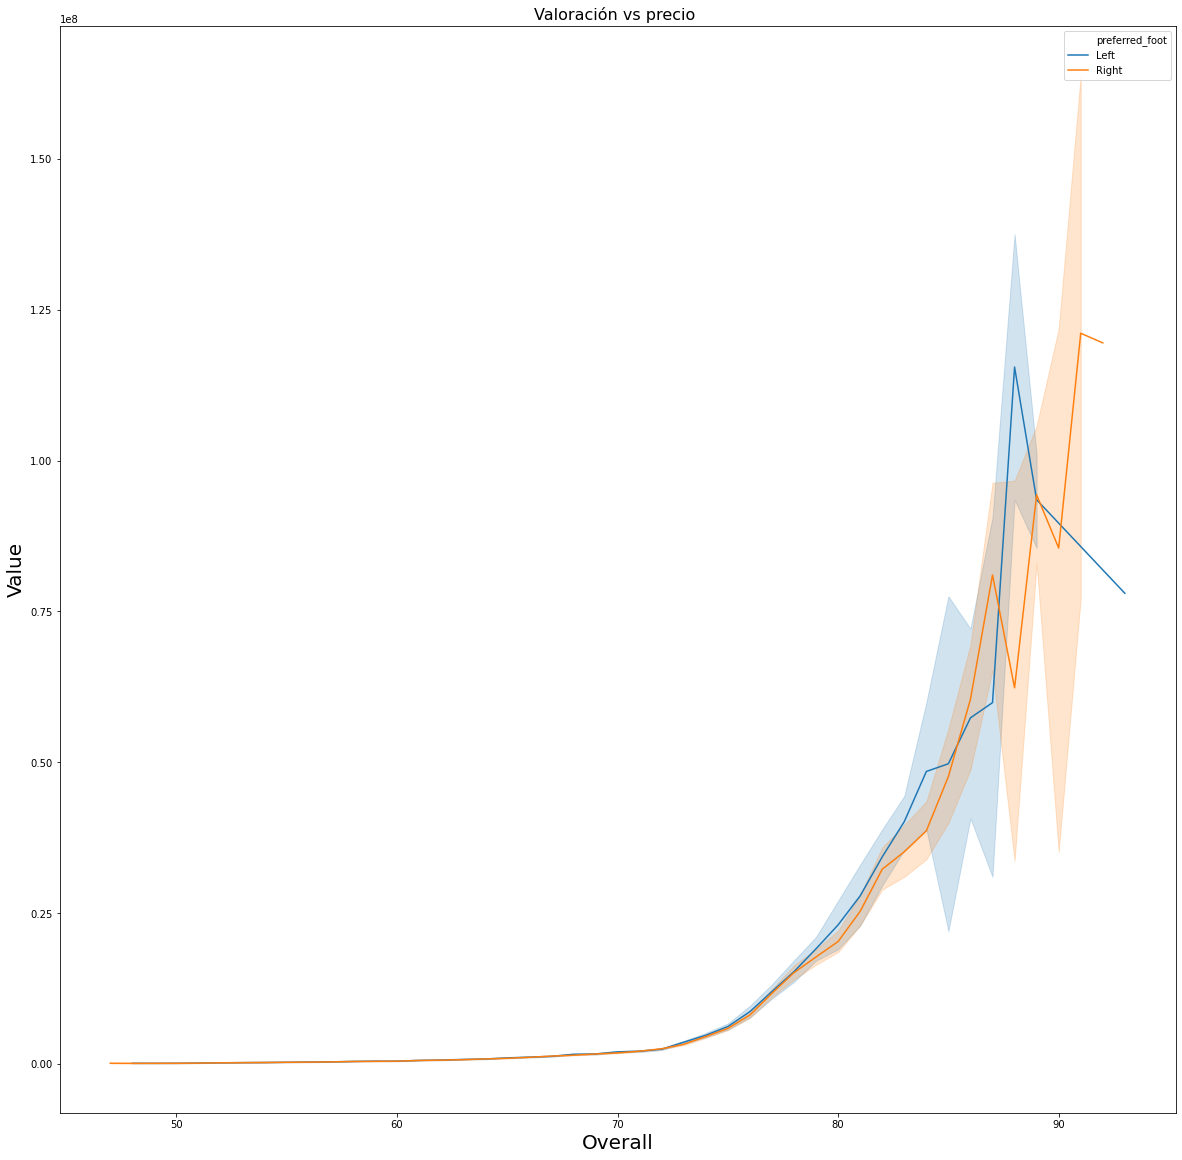

In [25]:
plt.figure(figsize=(20, 20))
sns.lineplot(x = df['overall'], y= df['value_eur'],  data=df, hue='preferred_foot')
plt.title("Valoración vs precio ", fontsize=16)
plt.xlabel("Overall", fontsize=20)
plt.xticks(rotation=0)
plt.ylabel("Value", fontsize=20)
plt.show()

Se puede ver que hasta los casi 80 de valoración casi no existe diferencia de valor entre los que usan la pierna derecha vs las izquierda. Luego de este rango alternan con subidas y bajadas

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

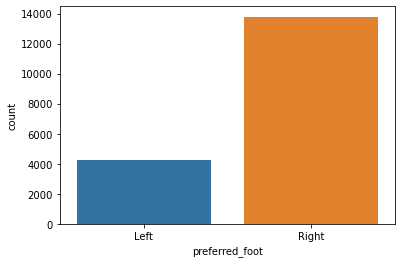

In [26]:
sns.countplot(x=df['preferred_foot'])

In [27]:
#Además armo otro dataset para guardar las variables club name y league name para los análisis de visualización
# me convendría poner esto más abajo todavía así se copia con todos los cambios que le haga al df
dfv = df
df = df.drop(columns = ['club_name','league_name'])


In [28]:
Total = df['nivel_jugador'].value_counts()/df['nivel_jugador'].value_counts().sum()
Total = Total.values.tolist()
A = Total[0]
B = Total[1]
C = Total[2]

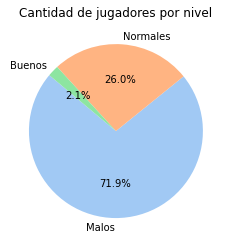

In [29]:
data = [A, B, C]
labels = ['Malos', 'Normales', 'Buenos']
colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%', startangle = 140)
plt.title('Cantidad de jugadores por nivel')
plt.show()

## 2.7 Correlación

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fm_df = df.copy()
corr_matrix = fm_df.corr()
corr_matrix['market'].sort_values(ascending=False)

market                1.000000
overall               0.745428
potential             0.695162
movement_reactions    0.636589
nivel_jugador         0.629947
                        ...   
club_jersey_number   -0.106450
nation_team_id       -0.107009
nationality_id       -0.137934
league_level         -0.171986
club_team_id         -0.237320
Name: market, Length: 68, dtype: float64

## 3. Ingeniería de variables


In [31]:
df['variable1'] = df['movement_reactions']+df['mentality_composure']
df['variable2'] = df['wage_eur']/df['age']
df['variable3'] = df['nivel_jugador']/df['age']
df['variable4'] = df['potential']+df['overall']


Le agrego ciertas variables realizando cálculos con las que ya tengo disponible para generar algunas nuevas que tengan una buena correlación con la variable a predecir: market

In [32]:
#Armo un nuevo dataframe resumido con las variables con mejor correlación para el modelo
dfr = df[['release_clause_eur','wage_eur','overall','potential','nivel_jugador', 'movement_reactions','mentality_composure','variable1','variable2','variable3','variable4','market']]
#dfr = df[['overall','potential','nivel_jugador',
      #   'movement_reactions','variable1','variable3','variable4','market']]







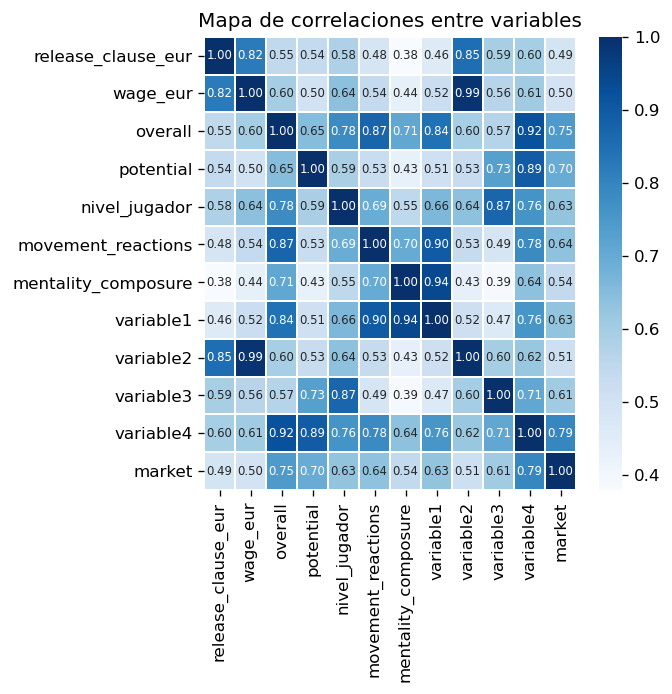

In [33]:
#Muestro la matriz de correlaciones para detectar si son buenas con mi variable a predecir
plt.figure(dpi = 120,figsize= (5,5))
sns.heatmap(dfr.corr(), fmt = ".2f", annot=True, cmap="Blues", annot_kws={"size":7}, lw=1)
plt.title('Mapa de correlaciones entre variables')
plt.show()

Se puede ver como una de las variables creadas es la que mejor correlación tiene con market

In [34]:
#Vuelvo a revisar que no tenga nulos para utilizar el dfr en el modelo
dfr.isnull().sum()

release_clause_eur     0
wage_eur               0
overall                0
potential              0
nivel_jugador          0
movement_reactions     0
mentality_composure    0
variable1              0
variable2              0
variable3              0
variable4              0
market                 0
dtype: int64

In [35]:
#Importación de librerías principales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from numpy import mean
from numpy import std 
from numpy import absolute

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


#Entrenamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#Evaluación de modelos
from sklearn import metrics


from sklearn.model_selection import GridSearchCV



Tanto lo que es validación cruzada como modelos de ensamble los realicé, pero lo terminé borrando porque los resultados no eran buenos para los modelos de ensamble y en cuanto a validación cruzada hacía el modelo más lento y encima no lo mejoraba. Por eso, más adelante en lo que es mejoras, solo se ve PCA

# 4. Modelado

In [95]:
# Selecciono las variables para mi modelo
y = dfr[['market']]
x = dfr.drop(columns = ['market'])


In [96]:
from sklearn.model_selection import train_test_split # Importo libreria para dividir los datos

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12) 
    
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12644, 11)
(5419, 11)
(12644, 1)
(5419, 1)


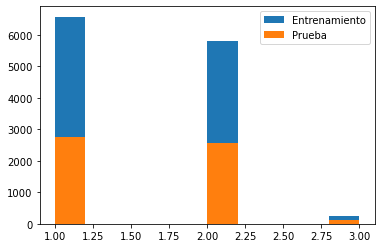

In [97]:
import matplotlib.pyplot as plt  # Grafico como me queda dividido el modelo
%matplotlib inline
plt.hist(y_train, label="Entrenamiento")
plt.hist(y_test, label="Prueba")
plt.legend()
plt.show()

se puede observar que tengo pocos datos de la clase 3 en comparación a los otros 2

## A) KNN

In [98]:
from sklearn.model_selection import RandomizedSearchCV  # Hypertuning utilizando "randomized search cv"
from scipy.stats import uniform, randint # Definir distribuciones de los parametros y el número de iteracionescon "scipy" 

param_dist = {"n_neighbors": randint(4, 6),"leaf_size": randint(20, 30)}
iteraciones = 10

In [99]:
%%time

from sklearn.neighbors import KNeighborsClassifier


# Paso 1 - Instanciamos el modelo
knn = KNeighborsClassifier(n_neighbors=3)

CPU times: total: 0 ns
Wall time: 0 ns


In [100]:
# Paso 2 - Definimos los parámetros de búsqueda (hypertuning)

RS_knn = RandomizedSearchCV(knn, param_distributions = param_dist, cv=5, n_iter=iteraciones, n_jobs=4, verbose=0)

# Paso 3 - Entrenamos el modelo

RS_knn.fit(x_train, y_train)



C:\Users\federico.asensio\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_jobs=4,
                   param_distributions={'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BBA982B0D0>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BBA816C340>})

In [101]:
RS_knn.best_params_ # Mejor Parámetro

{'leaf_size': 21, 'n_neighbors': 4}

In [102]:
KNN_op = RS_knn.best_estimator_

In [103]:
# Paso 4 - Prediccion en Test

y_test_pred = KNN_op.predict(x_test) 

In [108]:
# Accuracy (Precisión)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Acuraccy score
accuracy_knn = accuracy_score(y_test, y_test_pred)

print('Accuracy: %.3f' % accuracy_knn)

# F1 Score
score_knn = f1_score(y_test, y_test_pred, average='weighted')
print('Score: %.3f' % score_knn)

precision_knn = precision_score(y_test, y_test_pred, average='weighted')

# Precision score
print('Precision: %.3f' % precision_knn)

recall_knn = recall_score(y_test, y_test_pred, average='weighted')

# Recall
print('Recall: %.3f' % recall_knn)


Accuracy: 0.949
Score: 0.949
Precision: 0.949
Recall: 0.949


[[2655   98    0]
 [ 164 2396    1]
 [   0   15   90]]


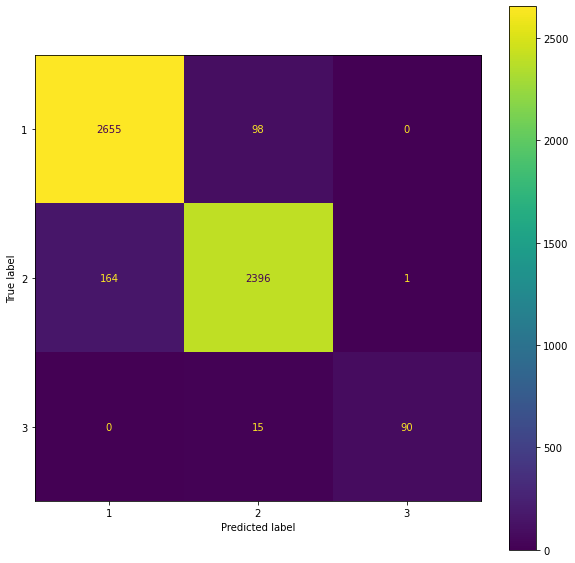

In [109]:
# Matriz de confusion

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RS_knn, x_test, y_test, ax=ax, colorbar=True)
plt.show()

In [110]:
#Evaluación del modelo
mae_knn = metrics.mean_absolute_error(y_test, y_test_pred).round(2)
mse_knn = metrics.mean_squared_error(y_test, y_test_pred).round(2)
rsme_knn = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(2)
print('Mean Absolute Error:', mae_knn)
print('Mean Squared Error:', mse_knn)
print('Root Mean Squared Error:', rsme_knn)

Mean Absolute Error: 0.05
Mean Squared Error: 0.05
Root Mean Squared Error: 0.23


Insights: me parece un modelo bastante aceptable dado que tiene poco error en los jugadores de primer nivel (3) que son los más valiosos y sería un error vender a alguno de ellos por un monto menor. No me preocupa tanto la confusión que se produce entre 1 y 2 debido a que los valores monetarios son más cercanos

## B) Regresión logística

In [111]:
%%time
from sklearn.linear_model import LogisticRegression

# Paso 1 - Instanciamos el modelo
regresion_logistica = LogisticRegression(random_state=11, multi_class='ovr', solver='lbfgs')

# Paso 2 - Entrenamos el modelo
regresion_logistica.fit(x,y)

# Paso 3 - Hacemos la predicción
y_test_pred = regresion_logistica.predict(x_test)

C:\Users\federico.asensio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CPU times: total: 875 ms
Wall time: 225 ms


[[2594  159    0]
 [ 196 2362    3]
 [   0   11   94]]


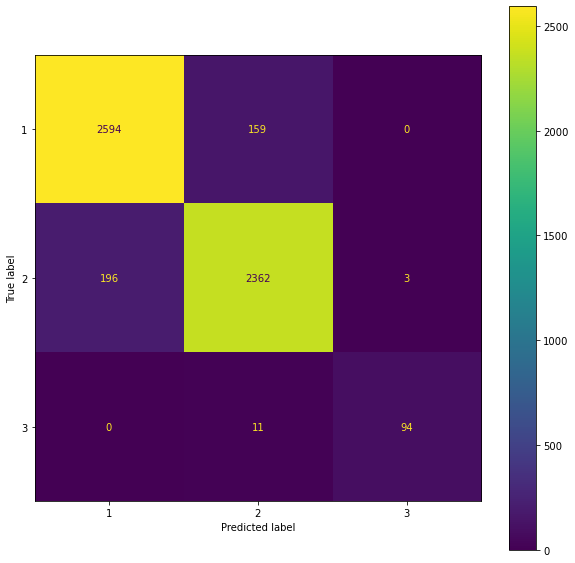

In [112]:
print(confusion_matrix(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(regresion_logistica, x_test, y_test, ax=ax)
plt.show()

In [113]:
# Accuracy (Precisión)

accuracy_rl = accuracy_score(y_test, y_test_pred)

print('Acuraccy: %.3f' % accuracy_rl)

score_rl = f1_score(y_test, y_test_pred, average='weighted')
print('Score: %.3f' % score_rl)

# Precision score
precision_rl = precision_score(y_test, y_test_pred, average='weighted')
print('Precision: %.3f' % precision_rl)

# Recall
recall_rl = recall_score(y_test, y_test_pred, average='weighted')
print('Recall: %.3f' % recall_rl)


Acuraccy: 0.932
Score: 0.932
Precision: 0.932
Recall: 0.932


In [115]:
#Evaluación del modelo
mae_rl = metrics.mean_absolute_error(y_test, y_test_pred).round(2)
mse_rl = metrics.mean_squared_error(y_test, y_test_pred).round(2)
rsme_rl = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(2)
print('Mean Absolute Error:', mae_rl)
print('Mean Squared Error:', mse_rl)
print('Root Mean Squared Error:', rsme_rl)

Mean Absolute Error: 0.07
Mean Squared Error: 0.07
Root Mean Squared Error: 0.26


No me parece el modelo adecuado, si bien su score y accuracy son altos, considera a los jugadores de primer nivel como de niveles más bajos 

## C) Random Forest

In [116]:
from sklearn.model_selection import GridSearchCV # Hypertuning utilizando grid search

In [117]:
%%time 

# Paso 1 - Instanciamos el modelo

from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(random_state=11, n_jobs=6)

CPU times: total: 0 ns
Wall time: 999 µs


In [118]:
# Paso 2 - Definimos los parámetros de búsqueda (hypertuning)

params = {'n_estimators' : [512, 1024, 2048],'max_features': [2,3]}

GS_RF = GridSearchCV(estimator = clf, param_grid = params, scoring = 'neg_mean_absolute_error', cv = 5, verbose = 1, n_jobs = -1)

In [119]:
# Paso 3 - Entrenamos el modelo
GS_RF.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\federico.asensio\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=6, random_state=11),
             n_jobs=-1,
             param_grid={'max_features': [2, 3],
                         'n_estimators': [512, 1024, 2048]},
             scoring='neg_mean_absolute_error', verbose=1)

In [120]:
GS_RF.best_params_

{'max_features': 3, 'n_estimators': 2048}

In [121]:
# Obtenemos el mejor modelo!
clf_op = GS_RF.best_estimator_

In [122]:
# Paso 4 - Predicción de casos nuevos
y_test_pred = clf_op.predict(x_test)

In [125]:
# Accuracy (Precisión)

accuracy_rf = accuracy_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy_rf)

score_rf = f1_score(y_test, y_test_pred, average='weighted')
print('Score: %.3f' % score_rf)

# Precision score
precision_rf = precision_score(y_test, y_test_pred, average='weighted')
print('Precision: %.3f' % precision_rf)

# Recall
recall_rf = recall_score(y_test, y_test_pred, average='weighted')
print('Recall: %.3f' % recall_rf)


Accuracy: 0.984
Score: 0.984
Precision: 0.984
Recall: 0.984


In [126]:
#Evaluación del modelo
mae_rf = metrics.mean_absolute_error(y_test, y_test_pred).round(2)
mse_rf = metrics.mean_squared_error(y_test, y_test_pred).round(2)
rsme_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(2)
print('Mean Absolute Error:', mae_rf)
print('Mean Squared Error:', mse_rf)
print('Root Mean Squared Error:', rsme_rf)

Mean Absolute Error: 0.02
Mean Squared Error: 0.02
Root Mean Squared Error: 0.13


[[2715   38    0]
 [  41 2519    1]
 [   0    9   96]]


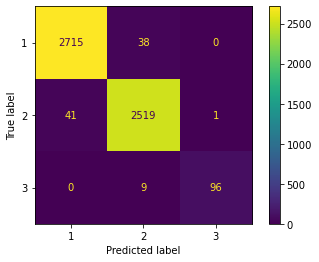

In [128]:
# Matriz de confusión

print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(GS_RF, x_test, y_test)
plt.show()

### Conclusiones de modelos

Teniendo en cuenta lo que es precisión y score, lo más adecuado es elegir el modelo de Random Forest, el cual es además el que tiene menos errores en la clase de jugador 3. Igualmente, los otros dos modelos son bastantes buenos, quedando en orden: RF, KNN y RL

## 5. Mejoras en los modelos


### 5.1 PCA

In [129]:
# Armo una lista con las columnas de mi dataframe a modelar
features = list(dfr.columns)
# saco de la lista la variable a predecir
features.pop()


'market'

In [130]:
from sklearn.preprocessing import StandardScaler
x = dfr.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizo las variables predictorias

In [131]:
x.shape

(18063, 11)

In [132]:
from sklearn.decomposition import PCA
pca_dfr = PCA(n_components=7)
principalComponents_dfr = pca_dfr.fit_transform(x)

In [133]:
np.mean(x),np.std(x)

(7.323818769844358e-17, 1.0)

In [134]:
#Asigno los nombres a las columnas
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [135]:
# Creo un nuevo dataframe
normalised_dfr = pd.DataFrame(x,columns=feat_cols)

In [136]:
normalised_dfr.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
18058,-0.351891,-0.398454,-2.696287,-3.104931,-0.600329,-0.919546,-1.699348,-1.480063,-0.401820,-0.356520,-3.178608
18059,-0.346606,-0.424004,-2.696287,-1.953919,-0.600329,-1.358976,-0.882309,-1.175620,-0.428569,0.030677,-2.586579
18060,-0.347810,-0.424004,-2.696287,-2.611641,-0.600329,-1.688548,-1.781052,-1.885987,-0.432071,-0.239746,-2.924881
18061,-0.343528,-0.424004,-2.696287,-1.789489,-0.600329,-1.468833,-0.882309,-1.226360,-0.428569,0.030677,-2.502003
18062,-0.345000,-0.424004,-2.696287,-1.789489,-0.600329,-0.809689,-1.781052,-1.480063,-0.428569,0.030677,-2.502003


In [137]:
pca_dfr = PCA(n_components=7)
principalComponents_dfr = pca_dfr.fit_transform(x)

In [138]:
principal_dfr = pd.DataFrame(data = principalComponents_dfr
             , columns = ['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
             

In [139]:
#Muestro las últimas filas
principal_dfr.tail()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
18058,-4.673576,1.706817,1.492930,-2.342244,0.100131,0.583412,-1.022989
18059,-3.874079,1.467219,0.785629,-1.746486,-0.960888,0.330620,-0.872503
18060,-4.816154,2.147273,0.894078,-2.008062,-0.250965,0.351773,-0.553207
18061,-3.847918,1.524749,0.655555,-1.624886,-1.029947,0.281505,-0.810317
18062,-3.965699,1.795116,0.442615,-1.574380,-0.090384,0.482623,-1.308791


In [140]:
# Muestro la varianza de cada componente principal
print('Explained variation per principal component: {}'.format(pca_dfr.explained_variance_ratio_))


Explained variation per principal component: [0.67336372 0.13037704 0.08353182 0.04504164 0.03246865 0.01904246
 0.01292472]


In [141]:
#Suma de la varianza de los PCA
pca_dfr.explained_variance_ratio_.sum()

0.9967500582147358

Si uso 7 variables ya obtengo casi el total de la varianza, probé con menos componentes y con más, pero este me pareció el más adecuado por el porcentaje que representa. 

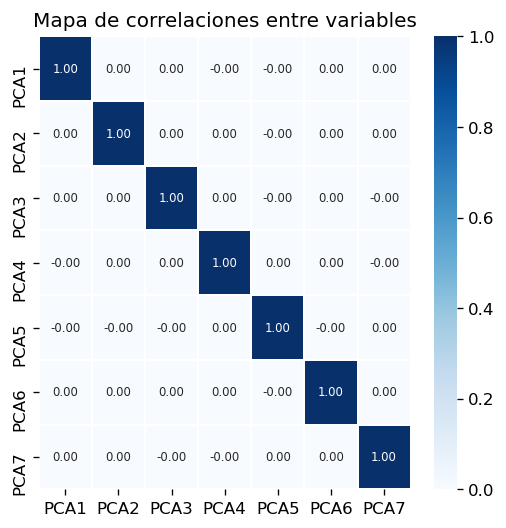

In [142]:
#Mapa de correlación de los PCA
plt.figure(dpi = 120,figsize= (5,5))
sns.heatmap(principal_dfr.corr(), fmt = ".2f", annot=True, cmap="Blues", annot_kws={"size":7}, lw=1)
plt.title('Mapa de correlaciones entre variables')
plt.show()

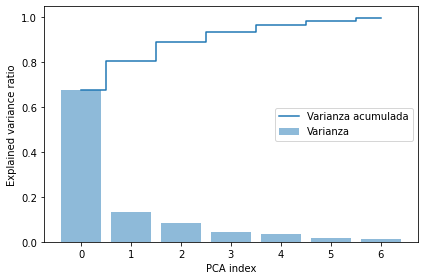

In [143]:
exp_var_pca = pca_dfr.explained_variance_ratio_

# Creo una variable para la varianza acumulada y poder graficarlo

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Creo la visualización

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Varianza')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Varianza acumulada')
plt.ylabel('Explained variance ratio')
plt.xlabel('PCA index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [144]:
dfr.tail()

,release_clause_eur,wage_eur,overall,potential,nivel_jugador,movement_reactions,mentality_composure,variable1,variable2,variable3,variable4,market
19234,114000.0,1000.0,47,52,1,53,37,90,45.454545,0.045455,99,1
19235,193000.0,500.0,47,59,1,49,47,96,26.315789,0.052632,106,1
19236,175000.0,500.0,47,55,1,46,36,82,23.809524,0.047619,102,1
19237,239000.0,500.0,47,60,1,48,47,95,26.315789,0.052632,107,1
19238,217000.0,500.0,47,60,1,54,36,90,26.315789,0.052632,107,1


In [145]:
#asigno las variables predictorias y las variables a predecir para los modelos con PCA
y = dfr[['market']]
x = principal_dfr
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12) 
    
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12644, 7)
(5419, 7)
(12644, 1)
(5419, 1)


## A) Modelo KNN con PCA 

In [146]:
param_dist = {"n_neighbors": randint(4, 6),"leaf_size": randint(20, 30)}
iteraciones = 10

In [147]:
%%time
# Paso 1 - Instancio el modelo
knn = KNeighborsClassifier(n_neighbors=3)

CPU times: total: 0 ns
Wall time: 0 ns


In [148]:
RS_knn = RandomizedSearchCV(knn, param_distributions = param_dist, cv=5, n_iter=iteraciones, n_jobs=4, verbose=0)

# Paso 3 - Entreno el modelo

RS_knn.fit(x_train, y_train)

C:\Users\federico.asensio\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_jobs=4,
                   param_distributions={'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BBAA61E790>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BBA94C1C70>})

In [149]:
RS_knn.best_params_ # busco el mejor Parámetro

{'leaf_size': 22, 'n_neighbors': 5}

In [150]:
KNN_op = RS_knn.best_estimator_

# Paso 4 - Prediccion del Test

y_test_pred = KNN_op.predict(x_test) 

# Accuracy (Precisión)
accuracy_knn_pca = accuracy_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy_knn_pca)

#Score
score_knn_pca = f1_score(y_test, y_test_pred, average='weighted')
print('Score: %.3f' % score_knn_pca)

# Precision score
precision_knn_pca = precision_score(y_test, y_test_pred, average='weighted')
print('Precision: %.3f' % precision_knn_pca)

# Recall
recall_knn_pca = recall_score(y_test, y_test_pred, average='weighted')
print('Recall: %.3f' % recall_knn_pca)

#Evaluación del modelo
mae_knn_pca = metrics.mean_absolute_error(y_test, y_test_pred).round(2)
mse_knn_pca = metrics.mean_squared_error(y_test, y_test_pred).round(2)
rsme_knn_pca = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(2)
print('Mean Absolute Error:', mae_knn_pca)
print('Mean Squared Error:', mse_knn_pca)
print('Root Mean Squared Error:', rsme_knn_pca)

Accuracy: 0.953
Score: 0.953
Precision: 0.953
Recall: 0.953
Mean Absolute Error: 0.05
Mean Squared Error: 0.05
Root Mean Squared Error: 0.22


[[2614  139    0]
 [  97 2459    5]
 [   0   12   93]]


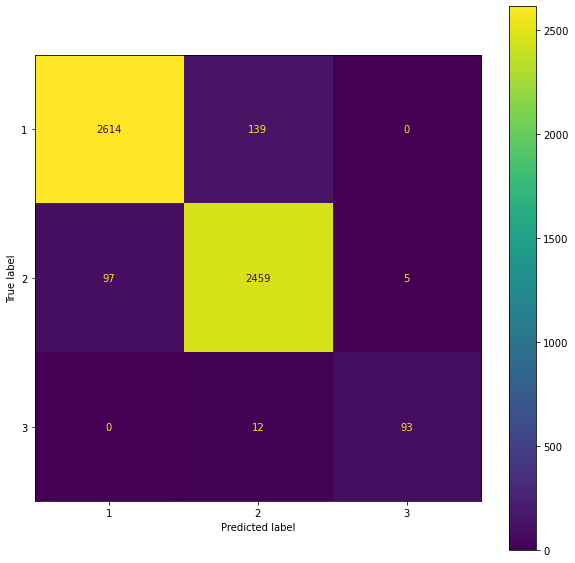

In [151]:
print(confusion_matrix(y_test, y_test_pred))

#Ploteo la Matriz
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(RS_knn, x_test, y_test, ax=ax, colorbar=True)
plt.show()

## B) Regresión logística con PCA

In [152]:
# Paso 1 - Instancio el modelo
regresion_logistica = LogisticRegression(random_state=11, multi_class='ovr', solver='lbfgs')

# Paso 2 - Entreno el modelo
regresion_logistica.fit(x,y)

# Paso 3 - Hago la predicción
y_test_pred = regresion_logistica.predict(x_test)

C:\Users\federico.asensio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [153]:
# Accuracy (Precisión)
accuracy_rl_pca = accuracy_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy_rl_pca)

#Score
score_rl_pca = f1_score(y_test, y_test_pred, average='weighted')
print('Score: %.3f' % score_rl_pca)

# Precision score
precision_rl_pca = precision_score(y_test, y_test_pred, average='weighted')
print('Precision: %.3f' % precision_rl_pca)

# Recall
recall_rl_pca = recall_score(y_test, y_test_pred, average='weighted')
print('Recall: %.3f' % recall_rl_pca)

#Evaluación del modelo
mae_rl_pca = metrics.mean_absolute_error(y_test, y_test_pred).round(2)
mse_rl_pca = metrics.mean_squared_error(y_test, y_test_pred).round(2)
rsme_rl_pca = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(2)
print('Mean Absolute Error:', mae_rl_pca)
print('Mean Squared Error:', mse_rl_pca)
print('Root Mean Squared Error:', rsme_rl_pca)

Accuracy: 0.934
Score: 0.934
Precision: 0.934
Recall: 0.934
Mean Absolute Error: 0.07
Mean Squared Error: 0.07
Root Mean Squared Error: 0.26


[[2567  186    0]
 [ 157 2403    1]
 [   0   13   92]]


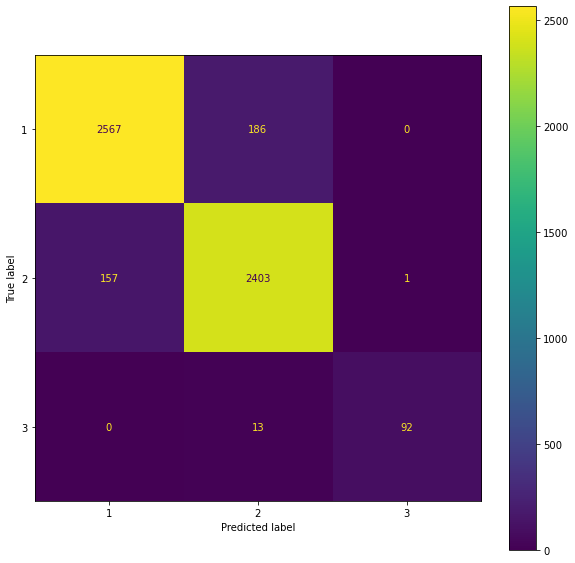

In [154]:
#Muestro la matriz de confusión
print(confusion_matrix(y_test, y_test_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(regresion_logistica, x_test, y_test, ax=ax)
plt.show()

## C) Random Forest con PCA

In [155]:
# Paso 1 - Instancio el modelo
clf = RandomForestClassifier(random_state=11, n_jobs=6)

# Paso 2 - Defino los parámetros de búsqueda (hypertuning)

params = {'n_estimators' : [512, 1024, 2048],'max_features': [2,3]}

GS_RF = GridSearchCV(estimator = clf, param_grid = params, scoring = 'neg_mean_absolute_error', cv = 5, verbose = 1, n_jobs = -1)

# Paso 3 - Entrenamos el modelo
GS_RF.fit(x_train, y_train)

# Obtenemos el mejor modelo!
clf_op = GS_RF.best_estimator_

# Paso 4 - Predicción de casos nuevos
y_test_pred = clf_op.predict(x_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\federico.asensio\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [156]:
# Accuracy (Precisión)
accuracy_rf_pca = accuracy_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy_rf_pca)

#Score
score_rf_pca = f1_score(y_test, y_test_pred, average='weighted')
print('Score: %.3f' % score_rf_pca)

# Precision score
precision_rf_pca = precision_score(y_test, y_test_pred, average='weighted')
print('Precision: %.3f' % precision_rf_pca)

# Recall
recall_rf_pca = recall_score(y_test, y_test_pred, average='weighted')
print('Recall: %.3f' % recall_rf_pca)

#Evaluación del modelo
mae_rf_pca = metrics.mean_absolute_error(y_test, y_test_pred).round(2)
mse_rf_pca = metrics.mean_squared_error(y_test, y_test_pred).round(2)
rsme_rf_pca = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)).round(2)
print('Mean Absolute Error:', mae_rf_pca)
print('Mean Squared Error:', mse_rf_pca)
print('Root Mean Squared Error:', rsme_rf_pca)

Accuracy: 0.958
Score: 0.958
Precision: 0.958
Recall: 0.958
Mean Absolute Error: 0.04
Mean Squared Error: 0.04
Root Mean Squared Error: 0.21


[[2631  122    0]
 [  94 2466    1]
 [   0   12   93]]


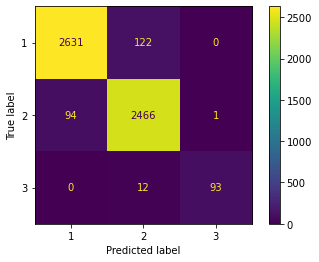

In [157]:
# Matriz de confusión

print(confusion_matrix(y_test, y_test_pred))

#Ploteamos la Matriz
plot_confusion_matrix(GS_RF, x_test, y_test)
plt.show()

### Conclusiones de mejoras de los modelos

Se ve como claramente a los modelos de regresión logística (a este en mayor medida) y KNN son mejorados al usar los 7 principales componentes del modelo. 

Para el caso de Random Forest, aplicar PCA lo desmejora

# 6. Otro modelo
#### Voy a realizar un modelo de K-Means para ver si no me convenía categorizar y después yo asignar a los jugadores según el valor que crea importante
## K-Means

In [158]:
from sklearn.cluster import KMeans

In [159]:
dfr2 = dfr.drop(columns = ['market'])
dfr_norm = (dfr2-dfr2.min())/(dfr2.max()-dfr2.min())
dfr_norm

,release_clause_eur,wage_eur,overall,potential,nivel_jugador,movement_reactions,mentality_composure,variable1,variable2,variable3,variable4
0,0.386319,0.914163,1.000000,0.956522,1.0,1.000000,1.000000,1.000000,0.806525,0.450980,1.000000
1,0.527958,0.771102,0.978261,0.934783,1.0,0.985507,0.904762,0.937931,0.722932,0.489583,0.977273
2,0.222992,0.771102,0.956522,0.913043,1.0,1.000000,0.988095,0.993103,0.642492,0.416667,0.954545
3,0.639074,0.771102,0.956522,0.913043,1.0,0.927536,0.964286,0.944828,0.797823,0.557471,0.954545
4,0.621671,1.000000,0.956522,0.913043,1.0,0.956522,0.916667,0.931034,1.000000,0.533333,0.954545
...,...,...,...,...,...,...,...,...,...,...,...
19234,0.000262,0.001431,0.000000,0.065217,0.0,0.405797,0.297619,0.310345,0.002879,0.151515,0.011364
19235,0.000474,0.000000,0.000000,0.217391,0.0,0.347826,0.416667,0.351724,0.001236,0.201754,0.090909
19236,0.000426,0.000000,0.000000,0.130435,0.0,0.304348,0.285714,0.255172,0.001021,0.166667,0.045455
19237,0.000597,0.000000,0.000000,0.239130,0.0,0.333333,0.416667,0.344828,0.001236,0.201754,0.102273


In [160]:
wcss = []
    
for i in range(1,11):
        kmeans = KMeans(n_clusters = i, max_iter = 300)
        kmeans.fit(dfr_norm)
        wcss.append(kmeans.inertia_)

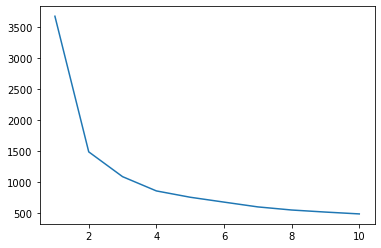

In [161]:
plt.plot(range(1,11), wcss)

In [162]:
clustering = KMeans(n_clusters = 3, max_iter = 300)
clustering.fit(dfr_norm)

KMeans(n_clusters=3)

Traté de ver si era más adecuado utilizar K-Means que mis dos modelos anteriormente usados, pero si los divido en 3 grupos que es como lo asigné a los otros modelos, y que además es en la parte del gráfico que se ve arriba en la que la línea deja de decrecer drásticamente, no está asignando a los grupos de la manera en la que espero. Por eso rechazo el modelo

# 7. Conclusiones del proyecto

In [190]:
#Armo listas para introducir en un dataframe y hacer una comparación de los 6 modelos
accuracy = [accuracy_knn,accuracy_rl,accuracy_rf]
accuracy_pca = [accuracy_knn_pca,accuracy_rl_pca,accuracy_rf_pca ]
score = [score_knn,score_rl,score_rf]
score_pca = [score_knn_pca,score_rl_pca,score_rf_pca ]
precision = [precision_knn,precision_rl,precision_rf]
precision_pca = [precision_knn_pca,precision_rl_pca,precision_rf_pca ]
recall = [recall_knn,recall_rl,recall_rf] 
recall_pca = [recall_knn_pca,recall_rl_pca,recall_rf_pca ]

mae = [mae_knn,mae_rl,mae_rf]
mae_pca = [mae_knn_pca, mae_rl_pca, mae_rf_pca]

mse = [mse_knn, mse_rl, mse_rf]
mse_pca = [mse_knn_pca, mse_rl_pca, mse_rf_pca]


rsme_pca = [rsme_knn_pca, rsme_rl_pca, rsme_rf_pca]
rsme = [rsme_knn, rsme_rl, rsme_rf]



In [192]:
# Armo el dataframe
t = pd.DataFrame()
t['Modelo'] = ['KNN','RL','Random Forest']

t['Accuracy'] = accuracy
t['Score'] = score
t['Precision'] = precision
t['Recall'] = recall


t['Accuracy PCA'] = accuracy_pca
t['Score PCA'] = score_pca
t['Precision PCA'] = precision_pca
t['Recall PCA'] = recall_pca

t['Mejora PCA %'] = ((t['Accuracy PCA']/t['Accuracy']) - 1)*100

t['MAE'] = mae
t['MAE PCA'] = mae_pca

t['Mejora MAE %'] = ((t['MAE']/t['MAE PCA']) - 1)*100


t['MSE'] = mse
t['MSE PCA'] = mse_pca

t['Mejora MSE %'] = ((t['MSE']/t['MSE PCA']) - 1)*100

t['RSME'] = rsme
t['RSME PCA'] = rsme_pca
t['Mejora RSME %'] = ((t['RSME']/t['RSME PCA']) - 1)*100

# Le introduje varias columnas para ver si el modelo con pca hace que el modelo mejore  
# y lo mido de manera porcentual en comparación con el anterior

t

,Modelo,Accuracy,Score,Precision,Recall,Accuracy PCA,Score PCA,Precision PCA,Recall PCA,Mejora PCA %,MAE,MAE PCA,Mejora MAE %,MSE,MSE PCA,Mejora MSE %,RSME,RSME PCA,Mejora RSME %
0,KNN,0.948699,0.948617,0.948947,0.948699,0.953312,0.953312,0.953492,0.953312,0.486287,0.05,0.05,0.0,0.05,0.05,0.0,0.23,0.22,4.545455
1,RL,0.931906,0.931880,0.931981,0.931906,0.934121,0.934136,0.934367,0.934121,0.237624,0.07,0.07,0.0,0.07,0.07,0.0,0.26,0.26,0.000000
2,Random Forest,0.983576,0.983552,0.983586,0.983576,0.957741,0.957733,0.957912,0.957741,-2.626642,0.02,0.04,-50.0,0.02,0.04,-50.0,0.13,0.21,-38.095238


1) Se puede ver en la tabla como la mejor opción es el modelo de Random Forest

2) Se ve que tanto su MAE, MSE Y RSME tienen mejores valores que los otros modelos

3) En las matrices de confusión que se graficaron anteriormente se puede ver que también es el mejor modelo ya que es el que menor porcentaje de errores tiene para agrupar a los futbolistas más valiosos

4) Se puede ver que tanto para KNN y RL la aplicación de PCA produce una mejora, a pesar de no ser significativa

5) El caso del PCA para el Random Forest empeora notablemente el modelo, es por ello que utilizo el modelo simple con el dataframe reducido a las variables que seleccioné por tener una correlación mayor a 0,6.